In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.distributions as dist
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
import pandas as pd
import random
from skimage.metrics import structural_similarity as compare_ssim
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Data

In [3]:
file_list = os.listdir('/content/drive/MyDrive/MSc data/data-4-genam-202209')
array_list = []
for file_name in file_list:
  file_path = os.path.join('/content/drive/MyDrive/MSc data/data-4-genam-202209', file_name)
  df = pd.read_csv(file_path)
  x_values = df['Points:0'].unique()
  y_values = df['Points:1'].unique()
  z_values = df['Points:2'].unique()
  x_len = len(x_values)
  y_len = len(y_values)
  z_len = len(z_values)
  pivot_df = df.pivot_table(index='Points:2', columns=['Points:1', 'Points:0'], values='pabs')
  array_3d = np.array([pivot_df[col].values for col in pivot_df.columns]).reshape(x_len, y_len, z_len)
  array_list.append(array_3d)
real_data_4_amp = np.stack(array_list)

In [4]:
file_list = os.listdir('/content/drive/MyDrive/MSc data/data-8-genam-202209')
array_list = []
for file_name in file_list:
  file_path = os.path.join('/content/drive/MyDrive/MSc data/data-8-genam-202209', file_name)
  df = pd.read_csv(file_path)
  x_values = df['Points:0'].unique()
  y_values = df['Points:1'].unique()
  z_values = df['Points:2'].unique()
  x_len = len(x_values)
  y_len = len(y_values)
  z_len = len(z_values)
  pivot_df = df.pivot_table(index='Points:2', columns=['Points:1', 'Points:0'], values='pabs')
  array_3d = np.array([pivot_df[col].values for col in pivot_df.columns]).reshape(x_len, y_len, z_len)
  array_list.append(array_3d)
real_data_8_amp = np.stack(array_list)

In [5]:
file_list = os.listdir('/content/drive/MyDrive/MSc data/data-16-genam-202210')
array_list = []
for file_name in file_list:
  file_path = os.path.join('/content/drive/MyDrive/MSc data/data-16-genam-202210', file_name)
  df = pd.read_csv(file_path)
  x_values = df['Points:0'].unique()
  y_values = df['Points:1'].unique()
  z_values = df['Points:2'].unique()
  x_len = len(x_values)
  y_len = len(y_values)
  z_len = len(z_values)
  pivot_df = df.pivot_table(index='Points:2', columns=['Points:1', 'Points:0'], values='pabs')
  array_3d = np.array([pivot_df[col].values for col in pivot_df.columns]).reshape(x_len, y_len, z_len)
  array_list.append(array_3d)
real_data_16_amp = np.stack(array_list)

In [6]:
file_list = os.listdir('/content/drive/MyDrive/MSc data/data-32-genam-202210')
array_list = []
for file_name in file_list:
  file_path = os.path.join('/content/drive/MyDrive/MSc data/data-32-genam-202210', file_name)
  df = pd.read_csv(file_path)
  x_values = df['Points:0'].unique()
  y_values = df['Points:1'].unique()
  z_values = df['Points:2'].unique()
  x_len = len(x_values)
  y_len = len(y_values)
  z_len = len(z_values)
  pivot_df = df.pivot_table(index='Points:2', columns=['Points:1', 'Points:0'], values='pabs')
  array_3d = np.array([pivot_df[col].values for col in pivot_df.columns]).reshape(x_len, y_len, z_len)
  array_list.append(array_3d)
real_data_32_amp = np.stack(array_list)

In [7]:
real_data_4_amp = torch.tensor(real_data_4_amp, dtype=torch.float32)
real_data_8_amp = torch.tensor(real_data_8_amp, dtype=torch.float32)
real_data_16_amp = torch.tensor(real_data_16_amp, dtype=torch.float32)
real_data_32_amp = torch.tensor(real_data_32_amp, dtype=torch.float32)

In [8]:
data_min = torch.min(real_data_4_amp)
data_max = torch.max(real_data_4_amp)
real_data_4_amp_normalized = (real_data_4_amp - data_min) / (data_max - data_min)
data_min = torch.min(real_data_8_amp)
data_max = torch.max(real_data_8_amp)
real_data_8_amp_normalized = (real_data_8_amp - data_min) / (data_max - data_min)
data_min = torch.min(real_data_16_amp)
data_max = torch.max(real_data_16_amp)
real_data_16_amp_normalized = (real_data_16_amp - data_min) / (data_max - data_min)
data_min = torch.min(real_data_32_amp)
data_max = torch.max(real_data_32_amp)
real_data_32_amp_normalized = (real_data_32_amp - data_min) / (data_max - data_min)

In [9]:
real_data_4_amp_normalized = real_data_4_amp_normalized.view(1024,100)
real_data_8_amp_normalized = real_data_8_amp_normalized.view(1024,567)
real_data_16_amp_normalized = real_data_16_amp_normalized.view(1024,3468)
real_data_32_amp_normalized = real_data_32_amp_normalized.view(1024,25047)

In [10]:
random_indices = torch.randperm(1024)
real_data_4_amp_normalized = real_data_4_amp_normalized[random_indices]
training_4_amp = real_data_4_amp_normalized[:900, :]
test_4_amp = real_data_4_amp_normalized[900:, :]
train_loader_4 = torch.utils.data.DataLoader(training_4_amp, batch_size=100, shuffle=True)

In [11]:
random_indices = torch.randperm(1024)
real_data_8_amp_normalized = real_data_8_amp_normalized[random_indices]
training_8_amp = real_data_8_amp_normalized[:900, :]
test_8_amp = real_data_8_amp_normalized[900:, :]
train_loader_8 = torch.utils.data.DataLoader(training_8_amp, batch_size=100, shuffle=True)

In [12]:
random_indices = torch.randperm(1024)
real_data_16_amp_normalized = real_data_16_amp_normalized[random_indices]
training_16_amp = real_data_16_amp_normalized[:900, :]
test_16_amp = real_data_16_amp_normalized[900:, :]
train_loader_16 = torch.utils.data.DataLoader(training_16_amp, batch_size=100, shuffle=True)

In [13]:
random_indices = torch.randperm(1024)
real_data_32_amp_normalized = real_data_32_amp_normalized[random_indices]
training_32_amp = real_data_32_amp_normalized[:900, :]
test_32_amp = real_data_32_amp_normalized[900:, :]
train_loader_32 = torch.utils.data.DataLoader(training_32_amp, batch_size=100, shuffle=True)

# MLP

In [14]:
def compute_cosine_similarity(array1, array2):
    if array1.shape != array2.shape:
        raise ValueError("different size")
    vector1 = array1.reshape(-1)
    vector2 = array2.reshape(-1)

    dot_product = np.dot(vector1, vector2)

    norm1 = np.linalg.norm(vector1)
    norm2 = np.linalg.norm(vector2)

    cosine_similarity = dot_product / (norm1 * norm2)

    return cosine_similarity

In [15]:
def compute_ssim_3d(array1, array2, win_size=3):
    if array1.shape != array2.shape:
        raise ValueError("different size")

    ssim_values = []

    for i in range(array1.shape[0]):
        slice1 = array1[i, :, :]
        slice2 = array2[i, :, :]
        ssim_score, _ = compare_ssim(slice1, slice2, win_size=3, multichannel=False, full=True)
        ssim_values.append(ssim_score)

    mean_ssim = np.mean(ssim_values)
    return mean_ssim

In [16]:
def vae_loss(reconstructed_x, x, mu, logvar):
    reconstruction_loss = F.binary_cross_entropy(reconstructed_x, x, reduction='sum')

    kl_divergence = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())

    total_loss = reconstruction_loss + kl_divergence
    return total_loss

In [17]:
class VAE4MLP(nn.Module):
    def __init__(self, input_dim, hidden_dim, latent_dim):
        super(VAE4MLP, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
        )
        self.fc_mu = nn.Linear(hidden_dim, latent_dim)
        self.fc_logvar = nn.Linear(hidden_dim, latent_dim)

        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, input_dim),
            nn.Sigmoid()  # For binary data (e.g., images in [0, 1])
        )

    def encode(self, x):
        hidden = self.encoder(x)
        mu = self.fc_mu(hidden)
        logvar = self.fc_logvar(hidden)
        return mu, logvar

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        z = mu + eps * std
        return z

    def decode(self, z):
        return self.decoder(z)

    def forward(self, x):
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar)
        reconstructed_x = self.decode(z)
        return reconstructed_x, mu, logvar

In [31]:
input_dim = 100
learning_rate = 1e-2
num_epochs = 1000

In [32]:
cos_result_array = []
ssim_result_array = []
for h in range(5,15):
  hidden_dim = 5*h
  for l in range(1,4):
    latent_dim = 5*l
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = VAE4MLP(input_dim, hidden_dim, latent_dim).to(device)
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    model.train()
    for epoch in range(num_epochs):
      total_loss = 0
      for data in train_loader_4:
         data = data.to(device)
         reconstructed_x, mu, logvar = model(data)
         loss = vae_loss(reconstructed_x, data, mu, logvar)
         total_loss += loss.item()
         optimizer.zero_grad()
         loss.backward()
         optimizer.step()
    print("hidden_dim = :", hidden_dim)
    model.eval()
    with torch.no_grad():
      reconstructed_x, mu, logvar = model(test_4_amp)
    cos_result_array.append([hidden_dim, latent_dim, compute_cosine_similarity(reconstructed_x,test_4_amp)])
    reconstructed_x_ssim = reconstructed_x.view(124, 4, 5, 5).numpy()
    test_4_amp_ssim = test_4_amp.view(124, 4, 5, 5).numpy()
    ssim_values = []
    for i in range(test_4_amp_ssim.shape[0]):
      ssim_score = compute_ssim_3d(test_4_amp_ssim[i], reconstructed_x_ssim[i], win_size=3)
      ssim_values.append([ssim_score])
    ssim_values_mean = np.array(ssim_values).mean()
    ssim_result_array.append([hidden_dim, latent_dim, ssim_values_mean])
ssim_result_array = np.array(ssim_result_array)
cos_result_array = np.array(cos_result_array)

hidden_dim = : 25


<ipython-input-15-3c500f7ede1b>:10: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score, _ = compare_ssim(slice1, slice2, win_size=3, multichannel=False, full=True)


hidden_dim = : 25
hidden_dim = : 25
hidden_dim = : 30
hidden_dim = : 30
hidden_dim = : 30
hidden_dim = : 35
hidden_dim = : 35
hidden_dim = : 35
hidden_dim = : 40
hidden_dim = : 40
hidden_dim = : 40
hidden_dim = : 45
hidden_dim = : 45
hidden_dim = : 45
hidden_dim = : 50
hidden_dim = : 50
hidden_dim = : 50
hidden_dim = : 55
hidden_dim = : 55
hidden_dim = : 55
hidden_dim = : 60
hidden_dim = : 60
hidden_dim = : 60
hidden_dim = : 65
hidden_dim = : 65
hidden_dim = : 65
hidden_dim = : 70
hidden_dim = : 70
hidden_dim = : 70


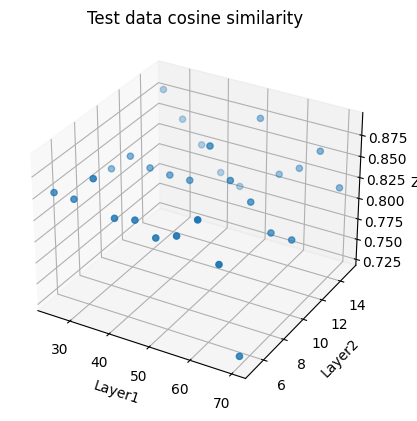

In [33]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = cos_result_array[:, 0]
y = cos_result_array[:, 1]
z = cos_result_array[:, 2]
ax.scatter(x, y, z)
ax.set_xlabel('Layer1')
ax.set_ylabel('Layer2')
ax.set_zlabel('Z')
ax.set_title('Test data cosine similarity')
plt.show()

In [34]:
z.max()

0.8895829916000366

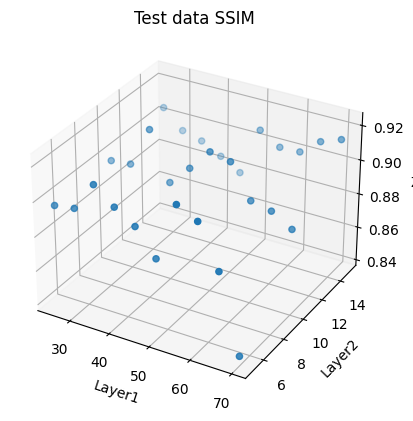

In [35]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = ssim_result_array[:, 0]
y = ssim_result_array[:, 1]
z = ssim_result_array[:, 2]
ax.scatter(x, y, z)
ax.set_xlabel('Layer1')
ax.set_ylabel('Layer2')
ax.set_zlabel('Z')
ax.set_title('Test data SSIM')
plt.show()

In [36]:
z.max()

0.9215937830644617

In [37]:
input_dim = 567
learning_rate = 1e-2
num_epochs = 1000

In [38]:
cos_result_array = []
ssim_result_array = []
for h in range(1,8):
  hidden_dim = 50*h
  for l in range(1,6):
    latent_dim = 10*l
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = VAE4MLP(input_dim, hidden_dim, latent_dim).to(device)
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    model.train()
    for epoch in range(num_epochs):
      total_loss = 0
      for data in train_loader_8:
         data = data.to(device)
         reconstructed_x, mu, logvar = model(data)
         loss = vae_loss(reconstructed_x, data, mu, logvar)
         total_loss += loss.item()
         optimizer.zero_grad()
         loss.backward()
         optimizer.step()
    print("hidden_dim = :", hidden_dim)
    model.eval()
    with torch.no_grad():
      reconstructed_x, mu, logvar = model(test_8_amp)
    cos_result_array.append([hidden_dim, latent_dim, compute_cosine_similarity(reconstructed_x,test_8_amp)])
    reconstructed_x_ssim = reconstructed_x.view(124, 7, 9, 9).numpy()
    test_8_amp_ssim = test_8_amp.view(124, 7, 9, 9).numpy()
    ssim_values = []
    for i in range(test_8_amp_ssim.shape[0]):
      ssim_score = compute_ssim_3d(test_8_amp_ssim[i], reconstructed_x_ssim[i], win_size=3)
      ssim_values.append([ssim_score])
    ssim_values_mean = np.array(ssim_values).mean()
    ssim_result_array.append([hidden_dim, latent_dim, ssim_values_mean])
ssim_result_array = np.array(ssim_result_array)
cos_result_array = np.array(cos_result_array)

hidden_dim = : 50


<ipython-input-15-3c500f7ede1b>:10: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score, _ = compare_ssim(slice1, slice2, win_size=3, multichannel=False, full=True)


hidden_dim = : 50
hidden_dim = : 50
hidden_dim = : 50
hidden_dim = : 50
hidden_dim = : 100
hidden_dim = : 100
hidden_dim = : 100
hidden_dim = : 100
hidden_dim = : 100
hidden_dim = : 150
hidden_dim = : 150
hidden_dim = : 150
hidden_dim = : 150
hidden_dim = : 150
hidden_dim = : 200
hidden_dim = : 200
hidden_dim = : 200
hidden_dim = : 200
hidden_dim = : 200
hidden_dim = : 250
hidden_dim = : 250
hidden_dim = : 250
hidden_dim = : 250
hidden_dim = : 250
hidden_dim = : 300
hidden_dim = : 300
hidden_dim = : 300
hidden_dim = : 300
hidden_dim = : 300
hidden_dim = : 350
hidden_dim = : 350
hidden_dim = : 350
hidden_dim = : 350
hidden_dim = : 350


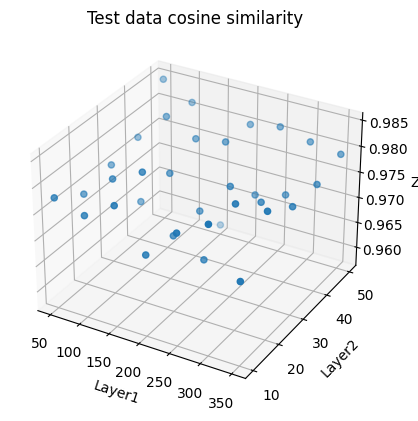

In [39]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = cos_result_array[:, 0]
y = cos_result_array[:, 1]
z = cos_result_array[:, 2]
ax.scatter(x, y, z)
ax.set_xlabel('Layer1')
ax.set_ylabel('Layer2')
ax.set_zlabel('Z')
ax.set_title('Test data cosine similarity')
plt.show()

In [40]:
z.max()

0.9845075011253357

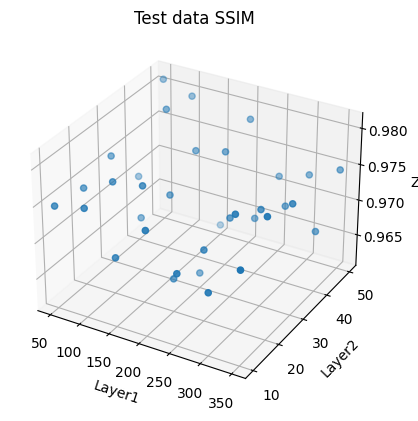

In [41]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = ssim_result_array[:, 0]
y = ssim_result_array[:, 1]
z = ssim_result_array[:, 2]
ax.scatter(x, y, z)
ax.set_xlabel('Layer1')
ax.set_ylabel('Layer2')
ax.set_zlabel('Z')
ax.set_title('Test data SSIM')
plt.show()

In [42]:
z.max()

0.9807703775040777

In [43]:
input_dim = 3468
learning_rate = 1e-2
num_epochs = 1200
hidden_dim =500
latent_dim = 100
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = VAE4MLP(input_dim, hidden_dim, latent_dim).to(device)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
model.train()
for epoch in range(num_epochs):
  total_loss = 0
  for data in train_loader_16:
    data = data.to(device)
    reconstructed_x, mu, logvar = model(data)
    loss = vae_loss(reconstructed_x, data, mu, logvar)
    total_loss += loss.item()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  print(f"Epoch {epoch+1}/{num_epochs}, Loss: {total_loss}")

Epoch 1/1200, Loss: 672253.978515625
Epoch 2/1200, Loss: 273731.0234375
Epoch 3/1200, Loss: 227442.369140625
Epoch 4/1200, Loss: 218273.13671875
Epoch 5/1200, Loss: 213819.51953125
Epoch 6/1200, Loss: 210103.515625
Epoch 7/1200, Loss: 208268.033203125
Epoch 8/1200, Loss: 207173.458984375
Epoch 9/1200, Loss: 206903.830078125
Epoch 10/1200, Loss: 206274.365234375
Epoch 11/1200, Loss: 206008.3515625
Epoch 12/1200, Loss: 206033.681640625
Epoch 13/1200, Loss: 206668.63671875
Epoch 14/1200, Loss: 206284.330078125
Epoch 15/1200, Loss: 206682.564453125
Epoch 16/1200, Loss: 206310.0390625
Epoch 17/1200, Loss: 206780.076171875
Epoch 18/1200, Loss: 206548.244140625
Epoch 19/1200, Loss: 205927.00390625
Epoch 20/1200, Loss: 205925.16796875
Epoch 21/1200, Loss: 205563.65625
Epoch 22/1200, Loss: 205879.578125
Epoch 23/1200, Loss: 205446.060546875
Epoch 24/1200, Loss: 205797.2265625
Epoch 25/1200, Loss: 206228.087890625
Epoch 26/1200, Loss: 206440.298828125
Epoch 27/1200, Loss: 205848.85546875
Epoch 2

In [44]:
model.eval()
with torch.no_grad():
  reconstructed_x, mu, logvar = model(test_16_amp)

In [45]:
compute_cosine_similarity(reconstructed_x,test_16_amp)

0.9905408

In [46]:
reconstructed_x_ssim = reconstructed_x.view(124, 12, 17, 17).numpy()
test_16_amp_ssim = test_16_amp.view(124, 12, 17, 17).numpy()
ssim_values = []
for i in range(test_16_amp_ssim.shape[0]):
  ssim_score = compute_ssim_3d(test_16_amp_ssim[i], reconstructed_x_ssim[i], win_size=3)
  ssim_values.append([ssim_score])
ssim_values_mean = np.array(ssim_values).mean()

<ipython-input-15-3c500f7ede1b>:10: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score, _ = compare_ssim(slice1, slice2, win_size=3, multichannel=False, full=True)


In [47]:
ssim_values_mean

0.9926452603743923

# 2D CNN

In [48]:
data_min = torch.min(real_data_4_amp)
data_max = torch.max(real_data_4_amp)
real_data_4_amp_normalized = (real_data_4_amp - data_min) / (data_max - data_min)
data_min = torch.min(real_data_8_amp)
data_max = torch.max(real_data_8_amp)
real_data_8_amp_normalized = (real_data_8_amp - data_min) / (data_max - data_min)
data_min = torch.min(real_data_16_amp)
data_max = torch.max(real_data_16_amp)
real_data_16_amp_normalized = (real_data_16_amp - data_min) / (data_max - data_min)
data_min = torch.min(real_data_32_amp)
data_max = torch.max(real_data_32_amp)
real_data_32_amp_normalized = (real_data_32_amp - data_min) / (data_max - data_min)

In [49]:
real_data_4_amp_normalized_CNN = real_data_4_amp_normalized.permute(0, 3, 1, 2)
real_data_8_amp_normalized_CNN = real_data_8_amp_normalized.permute(0, 3, 1, 2)
real_data_16_amp_normalized_CNN = real_data_16_amp_normalized.permute(0, 3, 1, 2)
real_data_32_amp_normalized_CNN = real_data_32_amp_normalized.permute(0, 3, 1, 2)

In [50]:
random_indices = torch.randperm(1024)
real_data_4_amp_normalized_CNN = real_data_4_amp_normalized_CNN[random_indices]
training_4_amp = real_data_4_amp_normalized_CNN[:900, :]
test_4_amp = real_data_4_amp_normalized_CNN[900:, :]
train_loader_4 = torch.utils.data.DataLoader(training_4_amp, batch_size=100, shuffle=True)

In [51]:
random_indices = torch.randperm(1024)
real_data_8_amp_normalized_CNN = real_data_8_amp_normalized_CNN[random_indices]
training_8_amp = real_data_8_amp_normalized_CNN[:900, :]
test_8_amp = real_data_8_amp_normalized_CNN[900:, :]
train_loader_8 = torch.utils.data.DataLoader(training_8_amp, batch_size=100, shuffle=True)

In [52]:
random_indices = torch.randperm(1024)
real_data_16_amp_normalized_CNN = real_data_16_amp_normalized_CNN[random_indices]
training_16_amp = real_data_16_amp_normalized_CNN[:900, :]
test_16_amp = real_data_16_amp_normalized_CNN[900:, :]
train_loader_16 = torch.utils.data.DataLoader(training_16_amp, batch_size=100, shuffle=True)

In [53]:
random_indices = torch.randperm(1024)
real_data_32_amp_normalized_CNN = real_data_32_amp_normalized_CNN[random_indices]
training_32_amp = real_data_32_amp_normalized_CNN[:900, :]
test_32_amp = real_data_32_amp_normalized_CNN[900:, :]
train_loader_32 = torch.utils.data.DataLoader(training_32_amp, batch_size=100, shuffle=True)

In [54]:
class VAE(nn.Module):
    def __init__(self, latent_dim):
        super(VAE, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(in_channels=4, out_channels=16, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=2, padding=1),
            nn.ReLU()
        )
        self.fc_mean = nn.Sequential( nn.Linear(64 * 2 * 2, 100),
                                      nn.ReLU(),
                                      nn.Linear(100, latent_dim)
        )
        self.fc_logvar = nn.Sequential( nn.Linear(64 * 2 * 2, 100),
                                        nn.ReLU(),
                                        nn.Linear(100, latent_dim)
        )
        self.fc = nn.Sequential(nn.Linear(latent_dim, 100),
                                nn.ReLU(),
                                nn.Linear(100, 64 * 2 * 2)
                                )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(in_channels=64, out_channels=32, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(in_channels=32, out_channels=16, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(in_channels=16, out_channels=4, kernel_size=3, stride=1, padding=1),
            nn.Sigmoid()  # For binary data (e.g., images in [0, 1])
        )
        self.flatten = nn.Flatten(start_dim=1)

    def encode(self, x):
        hidden = self.encoder(x)
        #hidden = hidden.reshape(-1)
        #hidden = hidden.view(hidden.size(0), -1)
        hidden = self.flatten(hidden)
        mu = self.fc_mean(hidden)
        logvar = self.fc_logvar(hidden)
        return mu, logvar

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        z = mu + eps * std
        return z

    def decode(self, z):
        z = self.fc(z)
        z = z.view(z.size(0), 64, 2, 2)
        return self.decoder(z)

    def forward(self, x):
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar)
        reconstructed_x = self.decode(z)
        return reconstructed_x, mu, logvar

In [55]:
latent_dim = 9
learning_rate = 1e-2
num_epochs = 2000

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = VAE(latent_dim).to(device)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

def vae_loss(reconstructed_x, x, mu, logvar):
    reconstruction_loss = F.binary_cross_entropy(reconstructed_x, x, reduction='sum')

    kl_divergence = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())

    total_loss = reconstruction_loss + kl_divergence
    return total_loss

model.train()
for epoch in range(num_epochs):
    total_loss = 0
    for data in train_loader_4:
        data = data.to(device)

        reconstructed_x, mu, logvar = model(data)

        loss = vae_loss(reconstructed_x, data, mu, logvar)
        total_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {total_loss}")

print("Training finished!")

Epoch 1/2000, Loss: 29610.512573242188
Epoch 2/2000, Loss: 12325.174438476562
Epoch 3/2000, Loss: 10289.101196289062
Epoch 4/2000, Loss: 9829.113037109375
Epoch 5/2000, Loss: 9663.282592773438
Epoch 6/2000, Loss: 9557.463989257812
Epoch 7/2000, Loss: 9541.908264160156
Epoch 8/2000, Loss: 9433.793212890625
Epoch 9/2000, Loss: 9414.757141113281
Epoch 10/2000, Loss: 9384.512084960938
Epoch 11/2000, Loss: 9405.649597167969
Epoch 12/2000, Loss: 9475.040832519531
Epoch 13/2000, Loss: 9444.651245117188
Epoch 14/2000, Loss: 9483.971374511719
Epoch 15/2000, Loss: 9458.326599121094
Epoch 16/2000, Loss: 9438.152221679688
Epoch 17/2000, Loss: 9347.111511230469
Epoch 18/2000, Loss: 9469.461486816406
Epoch 19/2000, Loss: 9353.046020507812
Epoch 20/2000, Loss: 9385.771911621094
Epoch 21/2000, Loss: 9455.298889160156
Epoch 22/2000, Loss: 9383.185119628906
Epoch 23/2000, Loss: 9415.2099609375
Epoch 24/2000, Loss: 9351.263549804688
Epoch 25/2000, Loss: 9412.400451660156
Epoch 26/2000, Loss: 9407.7664794

In [56]:
model.eval()
with torch.no_grad():
  reconstructed_x, mu, logvar = model(test_4_amp)

In [57]:
compute_cosine_similarity(reconstructed_x,test_4_amp)

0.9156836

In [58]:
reconstructed_x_ssim = reconstructed_x.numpy()
test_4_amp_ssim = test_4_amp.numpy()
ssim_values = []
for i in range(test_4_amp_ssim.shape[0]):
  ssim_score = compute_ssim_3d(test_4_amp_ssim[i], reconstructed_x_ssim[i], win_size=3)
  ssim_values.append([ssim_score])
ssim_values_mean = np.array(ssim_values).mean()

<ipython-input-15-3c500f7ede1b>:10: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score, _ = compare_ssim(slice1, slice2, win_size=3, multichannel=False, full=True)


In [59]:
ssim_values_mean

0.8098639714528264

In [60]:
class VAE(nn.Module):
    def __init__(self, latent_dim):
        super(VAE, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(in_channels=7, out_channels=16, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=2, padding=1),
            nn.ReLU()
        )
        self.fc_mean = nn.Sequential( nn.Linear(64 * 3 * 3, 100),
                                      nn.ReLU(),
                                      nn.Linear(100, latent_dim)
        )
        self.fc_logvar = nn.Sequential( nn.Linear(64 * 3 * 3, 100),
                                        nn.ReLU(),
                                        nn.Linear(100, latent_dim)
        )
        self.fc = nn.Sequential(nn.Linear(latent_dim, 100),
                                nn.ReLU(),
                                nn.Linear(100, 64 * 3 * 3)
                                )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(in_channels=64, out_channels=32, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(in_channels=32, out_channels=16, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(in_channels=16, out_channels=7, kernel_size=3, stride=1, padding=1),
            nn.Sigmoid()  # For binary data (e.g., images in [0, 1])
        )
        self.flatten = nn.Flatten(start_dim=1)

    def encode(self, x):
        hidden = self.encoder(x)
        #hidden = hidden.reshape(-1)
        #hidden = hidden.view(hidden.size(0), -1)
        hidden = self.flatten(hidden)
        mu = self.fc_mean(hidden)
        logvar = self.fc_logvar(hidden)
        return mu, logvar

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        z = mu + eps * std
        return z

    def decode(self, z):
        z = self.fc(z)
        z = z.view(z.size(0), 64, 3, 3)
        return self.decoder(z)

    def forward(self, x):
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar)
        reconstructed_x = self.decode(z)
        return reconstructed_x, mu, logvar

In [61]:
latent_dim = 9
learning_rate = 1e-2
num_epochs = 2000

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = VAE(latent_dim).to(device)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

def vae_loss(reconstructed_x, x, mu, logvar):
    reconstruction_loss = F.binary_cross_entropy(reconstructed_x, x, reduction='sum')

    kl_divergence = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())

    total_loss = reconstruction_loss + kl_divergence
    return total_loss

model.train()
for epoch in range(num_epochs):
    total_loss = 0
    for data in train_loader_8:
        data = data.to(device)

        reconstructed_x, mu, logvar = model(data)

        loss = vae_loss(reconstructed_x, data, mu, logvar)
        total_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {total_loss}")

print("Training finished!")

Epoch 1/2000, Loss: 160083.52587890625
Epoch 2/2000, Loss: 56920.46044921875
Epoch 3/2000, Loss: 46997.828125
Epoch 4/2000, Loss: 43596.8984375
Epoch 5/2000, Loss: 42247.69482421875
Epoch 6/2000, Loss: 41782.4931640625
Epoch 7/2000, Loss: 41525.95849609375
Epoch 8/2000, Loss: 41172.72021484375
Epoch 9/2000, Loss: 40954.83203125
Epoch 10/2000, Loss: 41091.265625
Epoch 11/2000, Loss: 41078.4658203125
Epoch 12/2000, Loss: 40894.203369140625
Epoch 13/2000, Loss: 40620.597900390625
Epoch 14/2000, Loss: 40512.7470703125
Epoch 15/2000, Loss: 40337.822509765625
Epoch 16/2000, Loss: 40490.72900390625
Epoch 17/2000, Loss: 40459.8486328125
Epoch 18/2000, Loss: 40300.326416015625
Epoch 19/2000, Loss: 40528.8271484375
Epoch 20/2000, Loss: 40655.21240234375
Epoch 21/2000, Loss: 40404.438720703125
Epoch 22/2000, Loss: 40445.525146484375
Epoch 23/2000, Loss: 40528.2373046875
Epoch 24/2000, Loss: 40548.82666015625
Epoch 25/2000, Loss: 40262.281005859375
Epoch 26/2000, Loss: 40362.72265625
Epoch 27/2000

In [62]:
model.eval()
with torch.no_grad():
  reconstructed_x, mu, logvar = model(test_8_amp)

In [63]:
compute_cosine_similarity(reconstructed_x,test_8_amp)

0.923051

In [64]:
reconstructed_x_ssim = reconstructed_x.numpy()
test_8_amp_ssim = test_8_amp.numpy()
ssim_values = []
for i in range(test_8_amp_ssim.shape[0]):
  ssim_score = compute_ssim_3d(test_8_amp_ssim[i], reconstructed_x_ssim[i], win_size=3)
  ssim_values.append([ssim_score])
ssim_values_mean = np.array(ssim_values).mean()

<ipython-input-15-3c500f7ede1b>:10: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score, _ = compare_ssim(slice1, slice2, win_size=3, multichannel=False, full=True)


In [65]:
ssim_values_mean

0.9087101588724465

In [66]:
class VAE(nn.Module):
    def __init__(self, latent_dim):
        super(VAE, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(in_channels=12, out_channels=16, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=2, padding=1),
            nn.ReLU()
        )
        self.fc_mean = nn.Sequential( nn.Linear(64 * 5 * 5, 300),
                                      nn.ReLU(),
                                      nn.Linear(300, latent_dim)
        )
        self.fc_logvar = nn.Sequential( nn.Linear(64 * 5 * 5, 300),
                                        nn.ReLU(),
                                        nn.Linear(300, latent_dim)
        )
        self.fc = nn.Sequential(nn.Linear(latent_dim, 300),
                                nn.ReLU(),
                                nn.Linear(300, 64 * 5 * 5)
                                )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(in_channels=64, out_channels=32, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(in_channels=32, out_channels=16, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(in_channels=16, out_channels=12, kernel_size=3, stride=1, padding=1),
            nn.Sigmoid()  # For binary data (e.g., images in [0, 1])
        )
        self.flatten = nn.Flatten(start_dim=1)

    def encode(self, x):
        hidden = self.encoder(x)
        #hidden = hidden.reshape(-1)
        #hidden = hidden.view(hidden.size(0), -1)
        hidden = self.flatten(hidden)
        mu = self.fc_mean(hidden)
        logvar = self.fc_logvar(hidden)
        return mu, logvar

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        z = mu + eps * std
        return z

    def decode(self, z):
        z = self.fc(z)
        z = z.view(z.size(0), 64, 5, 5)
        return self.decoder(z)

    def forward(self, x):
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar)
        reconstructed_x = self.decode(z)
        return reconstructed_x, mu, logvar

In [67]:
latent_dim = 9
learning_rate = 1e-2
num_epochs = 1000

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = VAE(latent_dim).to(device)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

def vae_loss(reconstructed_x, x, mu, logvar):
    reconstruction_loss = F.binary_cross_entropy(reconstructed_x, x, reduction='sum')

    kl_divergence = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())

    total_loss = reconstruction_loss + kl_divergence
    return total_loss

model.train()
for epoch in range(num_epochs):
    total_loss = 0
    for data in train_loader_16:
        data = data.to(device)

        reconstructed_x, mu, logvar = model(data)

        loss = vae_loss(reconstructed_x, data, mu, logvar)
        total_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {total_loss}")

print("Training finished!")

Epoch 1/1000, Loss: 750796.25390625
Epoch 2/1000, Loss: 262034.248046875
Epoch 3/1000, Loss: 238659.787109375
Epoch 4/1000, Loss: 218136.41015625
Epoch 5/1000, Loss: 213509.560546875
Epoch 6/1000, Loss: 211117.6015625
Epoch 7/1000, Loss: 209526.056640625
Epoch 8/1000, Loss: 208628.1015625
Epoch 9/1000, Loss: 207687.66796875
Epoch 10/1000, Loss: 207559.375
Epoch 11/1000, Loss: 206930.46484375
Epoch 12/1000, Loss: 205750.61328125
Epoch 13/1000, Loss: 205501.322265625
Epoch 14/1000, Loss: 204755.4765625
Epoch 15/1000, Loss: 203844.251953125
Epoch 16/1000, Loss: 203804.369140625
Epoch 17/1000, Loss: 204021.09375
Epoch 18/1000, Loss: 203224.787109375
Epoch 19/1000, Loss: 202616.841796875
Epoch 20/1000, Loss: 202344.849609375
Epoch 21/1000, Loss: 202117.6171875
Epoch 22/1000, Loss: 202007.744140625
Epoch 23/1000, Loss: 202576.654296875
Epoch 24/1000, Loss: 202703.607421875
Epoch 25/1000, Loss: 201494.8359375
Epoch 26/1000, Loss: 201372.24609375
Epoch 27/1000, Loss: 201099.08203125
Epoch 28/1

In [68]:
model.eval()
with torch.no_grad():
  reconstructed_x, mu, logvar = model(test_16_amp)

In [69]:
compute_cosine_similarity(reconstructed_x,test_16_amp)

0.98874587

In [70]:
reconstructed_x_ssim = reconstructed_x.numpy()
test_16_amp_ssim = test_16_amp.numpy()
ssim_values = []
for i in range(test_16_amp_ssim.shape[0]):
  ssim_score = compute_ssim_3d(test_16_amp_ssim[i], reconstructed_x_ssim[i], win_size=3)
  ssim_values.append([ssim_score])
ssim_values_mean = np.array(ssim_values).mean()

<ipython-input-15-3c500f7ede1b>:10: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score, _ = compare_ssim(slice1, slice2, win_size=3, multichannel=False, full=True)


In [71]:
ssim_values_mean

0.9888478556585141

In [72]:
class VAE(nn.Module):
    def __init__(self, latent_dim):
        super(VAE, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(in_channels=23, out_channels=32, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=32, out_channels=48, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=48, out_channels=64, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=2, padding=1),
            nn.ReLU()
        )
        self.fc_mean = nn.Sequential( nn.Linear(128 * 3 * 3, 300),
                                      nn.ReLU(),
                                      nn.Linear(300, latent_dim)
        )
        self.fc_logvar = nn.Sequential( nn.Linear(128 * 3 * 3, 300),
                                        nn.ReLU(),
                                        nn.Linear(300, latent_dim)
        )
        self.fc = nn.Sequential(nn.Linear(latent_dim, 300),
                                nn.ReLU(),
                                nn.Linear(300, 128 * 3 * 3)
                                )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(in_channels=128, out_channels=64, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(in_channels=64, out_channels=48, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(in_channels=48, out_channels=32, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(in_channels=32, out_channels=23, kernel_size=3, stride=2, padding=1),
            nn.Sigmoid()  # For binary data (e.g., images in [0, 1])
        )
        self.flatten = nn.Flatten(start_dim=1)

    def encode(self, x):
        hidden = self.encoder(x)
        #hidden = hidden.reshape(-1)
        #hidden = hidden.view(hidden.size(0), -1)
        hidden = self.flatten(hidden)
        mu = self.fc_mean(hidden)
        logvar = self.fc_logvar(hidden)
        return mu, logvar

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        z = mu + eps * std
        return z

    def decode(self, z):
        z = self.fc(z)
        z = z.view(z.size(0), 128, 3, 3)
        return self.decoder(z)

    def forward(self, x):
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar)
        reconstructed_x = self.decode(z)
        return reconstructed_x, mu, logvar

In [73]:
latent_dim = 9
learning_rate = 1e-2
num_epochs = 1000

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = VAE(latent_dim).to(device)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

def vae_loss(reconstructed_x, x, mu, logvar):
    reconstruction_loss = F.binary_cross_entropy(reconstructed_x, x, reduction='sum')

    kl_divergence = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())

    total_loss = reconstruction_loss + kl_divergence
    return total_loss

model.train()
for epoch in range(num_epochs):
    total_loss = 0
    for data in train_loader_32:
        data = data.to(device)

        reconstructed_x, mu, logvar = model(data)

        loss = vae_loss(reconstructed_x, data, mu, logvar)
        total_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {total_loss}")

print("Training finished!")

Epoch 1/1000, Loss: 14942473559244.39
Epoch 2/1000, Loss: 1972896.953125
Epoch 3/1000, Loss: 1669636.84375
Epoch 4/1000, Loss: 1593938.859375
Epoch 5/1000, Loss: 1556816.453125
Epoch 6/1000, Loss: 1542018.21875
Epoch 7/1000, Loss: 1534613.796875
Epoch 8/1000, Loss: 1531244.71875
Epoch 9/1000, Loss: 1528055.109375
Epoch 10/1000, Loss: 1524857.28125
Epoch 11/1000, Loss: 1523315.28125
Epoch 12/1000, Loss: 1522597.3125
Epoch 13/1000, Loss: 1524144.46875
Epoch 14/1000, Loss: 1521974.0625
Epoch 15/1000, Loss: 1521850.703125
Epoch 16/1000, Loss: 1520607.25
Epoch 17/1000, Loss: 1521743.390625
Epoch 18/1000, Loss: 1523630.390625
Epoch 19/1000, Loss: 1518471.578125
Epoch 20/1000, Loss: 1517315.375
Epoch 21/1000, Loss: 1516910.0625
Epoch 22/1000, Loss: 1519007.015625
Epoch 23/1000, Loss: 1521995.265625
Epoch 24/1000, Loss: 1517715.8125
Epoch 25/1000, Loss: 1517631.984375
Epoch 26/1000, Loss: 1517853.140625
Epoch 27/1000, Loss: 1515677.171875
Epoch 28/1000, Loss: 1515211.4375
Epoch 29/1000, Loss: 

In [74]:
model.eval()
with torch.no_grad():
  reconstructed_x, mu, logvar = model(test_32_amp)

In [75]:
compute_cosine_similarity(reconstructed_x,test_32_amp)

0.9899822

In [76]:
reconstructed_x_ssim = reconstructed_x.numpy()
test_32_amp_ssim = test_32_amp.numpy()
ssim_values = []
for i in range(test_32_amp_ssim.shape[0]):
  ssim_score = compute_ssim_3d(test_32_amp_ssim[i], reconstructed_x_ssim[i], win_size=3)
  ssim_values.append([ssim_score])
ssim_values_mean = np.array(ssim_values).mean()

<ipython-input-15-3c500f7ede1b>:10: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score, _ = compare_ssim(slice1, slice2, win_size=3, multichannel=False, full=True)


In [77]:
ssim_values_mean

0.9907831316768824

# 3D CNN

In [79]:
data_min = torch.min(real_data_4_amp)
data_max = torch.max(real_data_4_amp)
real_data_4_amp_normalized = (real_data_4_amp - data_min) / (data_max - data_min)
data_min = torch.min(real_data_8_amp)
data_max = torch.max(real_data_8_amp)
real_data_8_amp_normalized = (real_data_8_amp - data_min) / (data_max - data_min)
data_min = torch.min(real_data_16_amp)
data_max = torch.max(real_data_16_amp)
real_data_16_amp_normalized = (real_data_16_amp - data_min) / (data_max - data_min)
data_min = torch.min(real_data_32_amp)
data_max = torch.max(real_data_32_amp)
real_data_32_amp_normalized = (real_data_32_amp - data_min) / (data_max - data_min)

In [80]:
real_data_4_amp_normalized = real_data_4_amp_normalized.permute(0, 3, 1, 2)
real_data_4_amp_normalized = real_data_4_amp_normalized.unsqueeze(1)
real_data_8_amp_normalized = real_data_8_amp_normalized.permute(0, 3, 1, 2)
real_data_8_amp_normalized = real_data_8_amp_normalized.unsqueeze(1)
real_data_16_amp_normalized = real_data_16_amp_normalized.permute(0, 3, 1, 2)
real_data_16_amp_normalized = real_data_16_amp_normalized.unsqueeze(1)
real_data_32_amp_normalized = real_data_32_amp_normalized.permute(0, 3, 1, 2)
real_data_32_amp_normalized = real_data_32_amp_normalized.unsqueeze(1)

In [81]:
random_indices = torch.randperm(1024)
real_data_4_amp_normalized = real_data_4_amp_normalized[random_indices]
training_4_amp = real_data_4_amp_normalized[:900, :]
test_4_amp = real_data_4_amp_normalized[900:, :]
train_loader_4 = torch.utils.data.DataLoader(training_4_amp, batch_size=100, shuffle=True)

In [82]:
random_indices = torch.randperm(1024)
real_data_8_amp_normalized = real_data_8_amp_normalized[random_indices]
training_8_amp = real_data_8_amp_normalized[:900, :]
test_8_amp = real_data_8_amp_normalized[900:, :]
train_loader_8 = torch.utils.data.DataLoader(training_8_amp, batch_size=100, shuffle=True)

In [83]:
random_indices = torch.randperm(1024)
real_data_16_amp_normalized = real_data_16_amp_normalized[random_indices]
training_16_amp = real_data_16_amp_normalized[:900, :]
test_16_amp = real_data_16_amp_normalized[900:, :]
train_loader_16 = torch.utils.data.DataLoader(training_16_amp, batch_size=100, shuffle=True)

In [84]:
random_indices = torch.randperm(1024)
real_data_32_amp_normalized = real_data_32_amp_normalized[random_indices]
training_32_amp = real_data_32_amp_normalized[:900, :]
test_32_amp = real_data_32_amp_normalized[900:, :]
train_loader_32 = torch.utils.data.DataLoader(training_32_amp, batch_size=100, shuffle=True)

In [85]:
class VAE3D(nn.Module):
    def __init__(self, latent_dim):
        super(VAE3D, self).__init__()

        self.encoder = nn.Sequential(
            nn.Conv3d(1, 16, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv3d(16, 32, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv3d(32, 64, 3, stride=2, padding=1),
            nn.ReLU()
        )
        self.flatten = nn.Flatten(start_dim=1)

        self.fc_mu = nn.Linear(64, latent_dim)
        self.fc_logvar = nn.Linear(64, latent_dim)


        self.fc = nn.Sequential(nn.Linear(latent_dim, 100),
                                nn.ReLU(),
                                nn.Linear(100, 64 * 1 * 2* 2)
                                )

        self.decoder = nn.Sequential(
            nn.ConvTranspose3d(64, 32, kernel_size=3, stride=2, padding=0),
            nn.ReLU(),
            nn.ConvTranspose3d(32, 16, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.ConvTranspose3d(16, 1, kernel_size=(4,3,3), stride=1, padding=1),
            nn.Sigmoid()
        )

    def encode(self, x):
        x = self.encoder(x)
        x = self.flatten(x)
        mu = self.fc_mu(x)
        logvar = self.fc_logvar(x)
        return mu, logvar

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        z = mu + eps * std
        return z

    def decode(self, z):
        z = self.fc(z)
        z = z.view(z.size(0), 64, 1, 2, 2)
        return self.decoder(z)

    def forward(self, x):
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar)
        reconstructed_x = self.decode(z)
        return reconstructed_x, mu, logvar


In [86]:
learning_rate = 1e-2
num_epochs = 1000
latent_dim = 9
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = VAE3D(latent_dim).to(device)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
model.train()
for epoch in range(num_epochs):
    total_loss = 0
    for data in train_loader_4:
        data = data.to(device)

        reconstructed_x, mu, logvar = model(data)

        loss = vae_loss(reconstructed_x, data, mu, logvar)
        total_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {total_loss}")

print("Training finished!")

Epoch 1/1000, Loss: 27510.936157226562
Epoch 2/1000, Loss: 11865.186157226562
Epoch 3/1000, Loss: 10378.315185546875
Epoch 4/1000, Loss: 9905.907409667969
Epoch 5/1000, Loss: 9945.964416503906
Epoch 6/1000, Loss: 9810.866882324219
Epoch 7/1000, Loss: 9707.357727050781
Epoch 8/1000, Loss: 9684.629455566406
Epoch 9/1000, Loss: 9624.671142578125
Epoch 10/1000, Loss: 9657.916015625
Epoch 11/1000, Loss: 9688.161926269531
Epoch 12/1000, Loss: 9625.748657226562
Epoch 13/1000, Loss: 9720.095458984375
Epoch 14/1000, Loss: 9646.187561035156
Epoch 15/1000, Loss: 9651.6279296875
Epoch 16/1000, Loss: 9635.403747558594
Epoch 17/1000, Loss: 9574.373657226562
Epoch 18/1000, Loss: 9591.271240234375
Epoch 19/1000, Loss: 9577.582763671875
Epoch 20/1000, Loss: 9617.009460449219
Epoch 21/1000, Loss: 9620.979125976562
Epoch 22/1000, Loss: 9568.287292480469
Epoch 23/1000, Loss: 9628.667114257812
Epoch 24/1000, Loss: 9612.739562988281
Epoch 25/1000, Loss: 9599.792785644531
Epoch 26/1000, Loss: 9571.6697387695

In [87]:
model.eval()
with torch.no_grad():
   reconstructed_x, mu, logvar = model(test_4_amp)

In [88]:
compute_cosine_similarity(reconstructed_x,test_4_amp)

0.8261779

In [89]:
reconstructed_x_ssim = reconstructed_x.numpy()
reconstructed_x_ssim = reconstructed_x_ssim.squeeze()
test_4_amp_ssim = test_4_amp.numpy()
test_4_amp_ssim = test_4_amp_ssim.squeeze()
ssim_values = []
for i in range(test_4_amp_ssim.shape[0]):
  ssim_score = compute_ssim_3d(test_4_amp_ssim[i], reconstructed_x_ssim[i], win_size=3)
  ssim_values.append([ssim_score])
ssim_values_mean = np.array(ssim_values).mean()

<ipython-input-15-3c500f7ede1b>:10: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score, _ = compare_ssim(slice1, slice2, win_size=3, multichannel=False, full=True)


In [90]:
ssim_values_mean

0.7725448852712055

In [93]:
class VAE3D(nn.Module):
    def __init__(self, latent_dim):
        super(VAE3D, self).__init__()

        self.encoder = nn.Sequential(
            nn.Conv3d(1, 16, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv3d(16, 32, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv3d(32, 64, 3, stride=2, padding=1),
            nn.ReLU()
        )
        self.flatten = nn.Flatten(start_dim=1)

        self.fc_mu = nn.Linear(64* 1 * 2* 2, latent_dim)
        self.fc_logvar = nn.Linear(64* 1 * 2* 2, latent_dim)


        self.fc = nn.Sequential(nn.Linear(latent_dim, 100),
                                nn.ReLU(),
                                nn.Linear(100, 64 * 1 * 2* 2)
                                )

        self.decoder = nn.Sequential(
            nn.ConvTranspose3d(64, 32, kernel_size=3, stride=2, padding=1, output_padding=(1,0,0)),
            nn.ReLU(),
            nn.ConvTranspose3d(32, 16, kernel_size=3, stride=2, padding=1, output_padding=(1,0,0)),
            nn.ReLU(),
            nn.ConvTranspose3d(16, 1, kernel_size=(2,3,3), stride=2, padding=1, output_padding=(1,0,0)),
            nn.Sigmoid()
        )

    def encode(self, x):
        x = self.encoder(x)
        x = self.flatten(x)
        mu = self.fc_mu(x)
        logvar = self.fc_logvar(x)
        return mu, logvar

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        z = mu + eps * std
        return z

    def decode(self, z):
        z = self.fc(z)
        z = z.view(z.size(0), 64, 1, 2, 2)
        return self.decoder(z)

    def forward(self, x):
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar)
        reconstructed_x = self.decode(z)
        return reconstructed_x, mu, logvar

In [94]:
learning_rate = 1e-2
num_epochs = 1000
latent_dim = 9
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = VAE3D(latent_dim).to(device)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
model.train()
for epoch in range(num_epochs):
    total_loss = 0
    for data in train_loader_8:
        data = data.to(device)

        reconstructed_x, mu, logvar = model(data)

        loss = vae_loss(reconstructed_x, data, mu, logvar)
        total_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {total_loss}")

print("Training finished!")

Epoch 1/1000, Loss: 180409.1865234375
Epoch 2/1000, Loss: 57664.890625
Epoch 3/1000, Loss: 46697.882568359375
Epoch 4/1000, Loss: 45036.2646484375
Epoch 5/1000, Loss: 42444.20849609375
Epoch 6/1000, Loss: 41577.1484375
Epoch 7/1000, Loss: 41350.151123046875
Epoch 8/1000, Loss: 40907.98876953125
Epoch 9/1000, Loss: 40768.904052734375
Epoch 10/1000, Loss: 40465.08349609375
Epoch 11/1000, Loss: 40521.1259765625
Epoch 12/1000, Loss: 40436.97265625
Epoch 13/1000, Loss: 40350.45166015625
Epoch 14/1000, Loss: 40399.689453125
Epoch 15/1000, Loss: 40369.677734375
Epoch 16/1000, Loss: 40269.904052734375
Epoch 17/1000, Loss: 40285.205322265625
Epoch 18/1000, Loss: 40263.286376953125
Epoch 19/1000, Loss: 40231.531982421875
Epoch 20/1000, Loss: 40207.6455078125
Epoch 21/1000, Loss: 40081.17041015625
Epoch 22/1000, Loss: 40045.183837890625
Epoch 23/1000, Loss: 39899.9306640625
Epoch 24/1000, Loss: 39983.225341796875
Epoch 25/1000, Loss: 39777.387939453125
Epoch 26/1000, Loss: 39718.754638671875
Epoc

In [97]:
model.eval()
with torch.no_grad():
   reconstructed_x, mu, logvar = model(test_8_amp)

In [99]:
compute_cosine_similarity(reconstructed_x,test_8_amp)

0.9706268

In [100]:
reconstructed_x_ssim = reconstructed_x.numpy()
reconstructed_x_ssim = reconstructed_x_ssim.squeeze()
test_8_amp_ssim = test_8_amp.numpy()
test_8_amp_ssim = test_8_amp_ssim.squeeze()
ssim_values = []
for i in range(test_8_amp_ssim.shape[0]):
  ssim_score = compute_ssim_3d(test_8_amp_ssim[i], reconstructed_x_ssim[i], win_size=3)
  ssim_values.append([ssim_score])
ssim_values_mean = np.array(ssim_values).mean()

<ipython-input-15-3c500f7ede1b>:10: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score, _ = compare_ssim(slice1, slice2, win_size=3, multichannel=False, full=True)


In [101]:
ssim_values_mean

0.9590822278676898

In [102]:
class VAE3D(nn.Module):
    def __init__(self, latent_dim):
        super(VAE3D, self).__init__()

        self.encoder = nn.Sequential(
            nn.Conv3d(1, 8, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv3d(8, 16, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv3d(16, 32, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv3d(32, 64, 3, stride=2, padding=1),
            nn.ReLU()
        )
        self.flatten = nn.Flatten(start_dim=1)

        self.fc_mu = nn.Linear(64* 1 * 2* 2, latent_dim)
        self.fc_logvar = nn.Linear(64* 1 * 2* 2, latent_dim)


        self.fc = nn.Sequential(nn.Linear(latent_dim, 100),
                                nn.ReLU(),
                                nn.Linear(100, 64 * 1 * 2* 2)
                                )

        self.decoder = nn.Sequential(
            nn.ConvTranspose3d(64, 32, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose3d(32, 16, kernel_size=(4,3,3), stride=2, padding=1,output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose3d(16, 8, kernel_size=(4,3,3), stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose3d(8, 1, kernel_size=4, stride=1, padding=1),
            nn.Sigmoid()
        )

    def encode(self, x):
        x = self.encoder(x)
        x = self.flatten(x)
        mu = self.fc_mu(x)
        logvar = self.fc_logvar(x)
        return mu, logvar

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        z = mu + eps * std
        return z

    def decode(self, z):
        z = self.fc(z)
        z = z.view(z.size(0), 64, 1, 2, 2)
        return self.decoder(z)

    def forward(self, x):
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar)
        reconstructed_x = self.decode(z)
        return reconstructed_x, mu, logvar

In [103]:
learning_rate = 1e-2
num_epochs = 1000
latent_dim = 9
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = VAE3D(latent_dim).to(device)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
model.train()
for epoch in range(num_epochs):
    total_loss = 0
    for data in train_loader_16:
        data = data.to(device)

        reconstructed_x, mu, logvar = model(data)

        loss = vae_loss(reconstructed_x, data, mu, logvar)
        total_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {total_loss}")

print("Training finished!")

Epoch 1/1000, Loss: 1667906.3125
Epoch 2/1000, Loss: 465878.13671875
Epoch 3/1000, Loss: 313692.0234375
Epoch 4/1000, Loss: 257667.03125
Epoch 5/1000, Loss: 230973.02734375
Epoch 6/1000, Loss: 219425.396484375
Epoch 7/1000, Loss: 214596.09375
Epoch 8/1000, Loss: 210793.466796875
Epoch 9/1000, Loss: 208754.55859375
Epoch 10/1000, Loss: 207222.681640625
Epoch 11/1000, Loss: 207141.5703125
Epoch 12/1000, Loss: 206533.880859375
Epoch 13/1000, Loss: 205847.345703125
Epoch 14/1000, Loss: 205213.16015625
Epoch 15/1000, Loss: 204991.373046875
Epoch 16/1000, Loss: 204892.751953125
Epoch 17/1000, Loss: 204299.19921875
Epoch 18/1000, Loss: 204100.837890625
Epoch 19/1000, Loss: 204151.705078125
Epoch 20/1000, Loss: 203778.263671875
Epoch 21/1000, Loss: 203269.771484375
Epoch 22/1000, Loss: 202866.02734375
Epoch 23/1000, Loss: 202959.123046875
Epoch 24/1000, Loss: 202372.87109375
Epoch 25/1000, Loss: 202050.228515625
Epoch 26/1000, Loss: 202411.861328125
Epoch 27/1000, Loss: 202485.833984375
Epoch 

In [104]:
model.eval()
with torch.no_grad():
   reconstructed_x, mu, logvar = model(test_16_amp)

In [105]:
compute_cosine_similarity(reconstructed_x,test_16_amp)

0.9866664

In [106]:
reconstructed_x_ssim = reconstructed_x.numpy()
reconstructed_x_ssim = reconstructed_x_ssim.squeeze()
test_16_amp_ssim = test_16_amp.numpy()
test_16_amp_ssim = test_16_amp_ssim.squeeze()
ssim_values = []
for i in range(test_16_amp_ssim.shape[0]):
  ssim_score = compute_ssim_3d(test_16_amp_ssim[i], reconstructed_x_ssim[i], win_size=3)
  ssim_values.append([ssim_score])
ssim_values_mean = np.array(ssim_values).mean()

<ipython-input-15-3c500f7ede1b>:10: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score, _ = compare_ssim(slice1, slice2, win_size=3, multichannel=False, full=True)


In [107]:
ssim_values_mean

0.9862824717066123

In [108]:
class VAE3D(nn.Module):
    def __init__(self, latent_dim):
        super(VAE3D, self).__init__()

        self.encoder = nn.Sequential(
            nn.Conv3d(1, 4, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv3d(4, 8, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv3d(8, 16, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv3d(16, 32, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv3d(32, 64, 3, stride=2, padding=1),
            nn.ReLU()
        )
        self.flatten = nn.Flatten(start_dim=1)

        self.fc_mu = nn.Linear(64*2*2, latent_dim)
        self.fc_logvar = nn.Linear(64*2*2, latent_dim)


        self.fc = nn.Sequential(nn.Linear(latent_dim, 100),
                                nn.ReLU(),
                                nn.Linear(100, 64 * 1 * 2* 2)
                                )

        self.decoder = nn.Sequential(
            nn.ConvTranspose3d(64, 32, kernel_size=3, stride=2, padding=0),
            nn.ReLU(),
            nn.ConvTranspose3d(32, 16, kernel_size=3, stride=2, padding=1, output_padding=(1,0,0)),
            nn.ReLU(),
            nn.ConvTranspose3d(16, 8, kernel_size=3, stride=2, padding=1, output_padding=(1,0,0)),
            nn.ReLU(),
            nn.ConvTranspose3d(8, 1, kernel_size=3, stride=2, padding=1),
            nn.Sigmoid()
        )

    def encode(self, x):
        x = self.encoder(x)
        x = self.flatten(x)
        mu = self.fc_mu(x)
        logvar = self.fc_logvar(x)
        return mu, logvar

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        z = mu + eps * std
        return z

    def decode(self, z):
        z = self.fc(z)
        z = z.view(z.size(0), 64, 1, 2, 2)
        return self.decoder(z)

    def forward(self, x):
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar)
        reconstructed_x = self.decode(z)
        return reconstructed_x, mu, logvar

In [109]:
learning_rate = 1e-2
num_epochs = 300
latent_dim = 9
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = VAE3D(latent_dim).to(device)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
model.train()
for epoch in range(num_epochs):
    total_loss = 0
    for data in train_loader_32:
        data = data.to(device)

        reconstructed_x, mu, logvar = model(data)

        loss = vae_loss(reconstructed_x, data, mu, logvar)
        total_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {total_loss}")

print("Training finished!")

Epoch 1/300, Loss: 11038454.78125
Epoch 2/300, Loss: 2603645.734375
Epoch 3/300, Loss: 1969815.921875
Epoch 4/300, Loss: 1763590.703125
Epoch 5/300, Loss: 1637137.421875
Epoch 6/300, Loss: 1593000.296875
Epoch 7/300, Loss: 1561231.296875
Epoch 8/300, Loss: 1540935.265625
Epoch 9/300, Loss: 1517540.640625
Epoch 10/300, Loss: 1508839.609375
Epoch 11/300, Loss: 1504942.390625
Epoch 12/300, Loss: 1538138.84375
Epoch 13/300, Loss: 1530071.546875
Epoch 14/300, Loss: 1520452.953125
Epoch 15/300, Loss: 1506696.953125
Epoch 16/300, Loss: 1500489.90625
Epoch 17/300, Loss: 1496708.828125
Epoch 18/300, Loss: 1496270.125
Epoch 19/300, Loss: 1495641.90625
Epoch 20/300, Loss: 1495066.640625
Epoch 21/300, Loss: 1493934.8125
Epoch 22/300, Loss: 1494291.3828125
Epoch 23/300, Loss: 1492217.15625
Epoch 24/300, Loss: 1491643.265625
Epoch 25/300, Loss: 1491471.4375
Epoch 26/300, Loss: 1491272.703125
Epoch 27/300, Loss: 1491585.40625
Epoch 28/300, Loss: 1490970.796875
Epoch 29/300, Loss: 1489958.21875
Epoch 

In [110]:
model.eval()
with torch.no_grad():
   reconstructed_x, mu, logvar = model(test_32_amp)

In [111]:
compute_cosine_similarity(reconstructed_x,test_32_amp)

0.9880481

In [112]:
reconstructed_x_ssim = reconstructed_x.numpy()
reconstructed_x_ssim = reconstructed_x_ssim.squeeze()
test_32_amp_ssim = test_32_amp.numpy()
test_32_amp_ssim = test_32_amp_ssim.squeeze()
ssim_values = []
for i in range(test_32_amp_ssim.shape[0]):
  ssim_score = compute_ssim_3d(test_32_amp_ssim[i], reconstructed_x_ssim[i], win_size=3)
  ssim_values.append([ssim_score])
ssim_values_mean = np.array(ssim_values).mean()

<ipython-input-15-3c500f7ede1b>:10: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score, _ = compare_ssim(slice1, slice2, win_size=3, multichannel=False, full=True)


In [113]:
ssim_values_mean

0.9886303386339254